In [55]:
!pip install opencv-python

import numpy as np
import cv2 
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [56]:
img = cv2.imread('./test_images/ronaldo_22.jpg')
img.shape

(957, 736, 3)

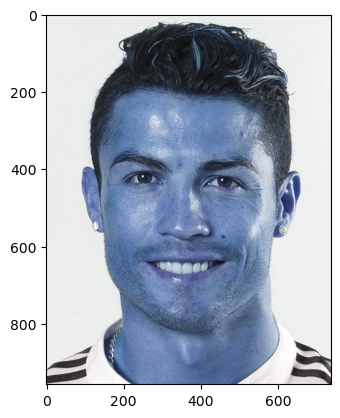

In [57]:
plt.imshow(img)
plt.show()

In [58]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(957, 736)

In [59]:
gray

array([[238, 238, 238, ..., 242, 242, 242],
       [238, 238, 238, ..., 242, 242, 242],
       [238, 238, 238, ..., 242, 242, 242],
       ...,
       [ 37,  39,  47, ...,  48,  39,  44],
       [ 95, 102, 117, ...,  49,  41,  45],
       [178, 184, 195, ...,  57,  49,  50]], dtype=uint8)

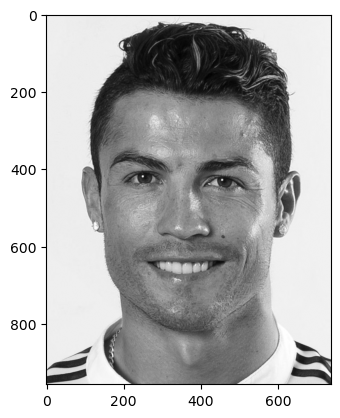

In [60]:
plt.imshow(gray, cmap='gray')
plt.show()

In [61]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 88, 219, 539, 539]], dtype=int32)

In [62]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(88), np.int32(219), np.int32(539), np.int32(539))

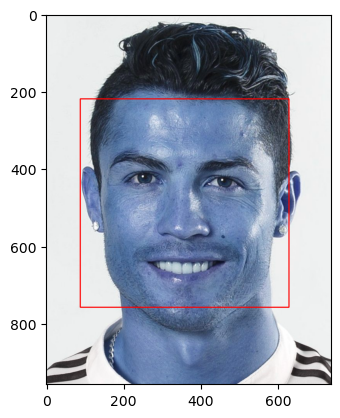

In [63]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

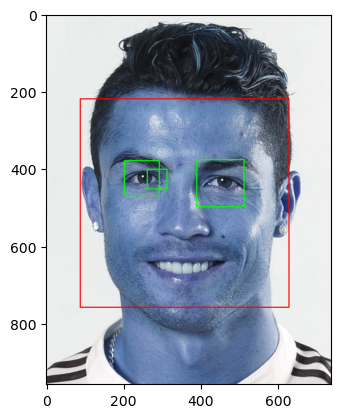

In [64]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

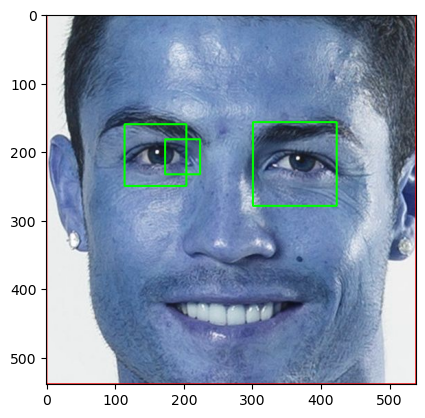

In [65]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [66]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

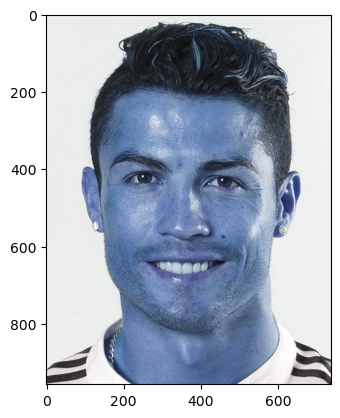

In [67]:
original_image = cv2.imread('./test_images/ronaldo_22.jpg')
plt.imshow(original_image)
plt.show()

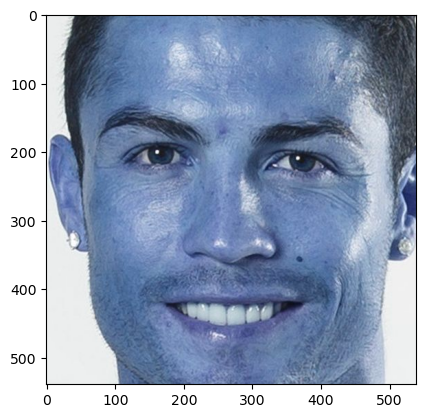

In [70]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/ronaldo_22.jpg')
plt.imshow(cropped_image)
plt.show()

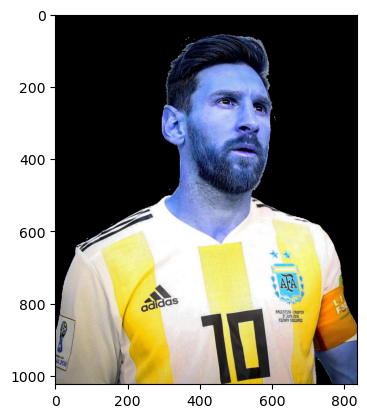

In [71]:
org_image_obstructed = cv2.imread('./test_images/messi_73.png')
plt.imshow(org_image_obstructed)
plt.show()

In [72]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/messi_73.png')
cropped_image_no_2_eyes

array([[[  3,   5,  34],
        [ 10,  12,  36],
        [  7,   9,  21],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  4,   5,  29],
        [  2,   1,  19],
        [  2,   1,   8],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  7,   0,  13],
        [  6,   0,   8],
        [  7,   6,   7],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[ 98, 124, 197],
        [ 79, 103, 174],
        [ 98, 120, 187],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[ 99, 124, 200],
        [ 84, 107, 181],
        [ 99, 118, 186],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[104, 129, 205],
        [ 91, 114, 187],
        [ 67,  88, 156],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [73]:
path_to_data = "./datasets/"
path_to_cr_data = "./datasets/cropped/"

In [74]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [75]:
img_dirs

['./datasets/cropped',
 './datasets/luka_modric',
 './datasets/messi',
 './datasets/roberto_carlos',
 './datasets/ronaldo',
 './datasets/zlatan_ibrahimovic']

In [76]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [77]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

cropped
luka_modric
Generating cropped images in folder:  ./datasets/cropped/luka_modric
messi
Generating cropped images in folder:  ./datasets/cropped/messi
roberto_carlos
Generating cropped images in folder:  ./datasets/cropped/roberto_carlos
ronaldo
Generating cropped images in folder:  ./datasets/cropped/ronaldo
zlatan_ibrahimovic
Generating cropped images in folder:  ./datasets/cropped/zlatan_ibrahimovic


In [78]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

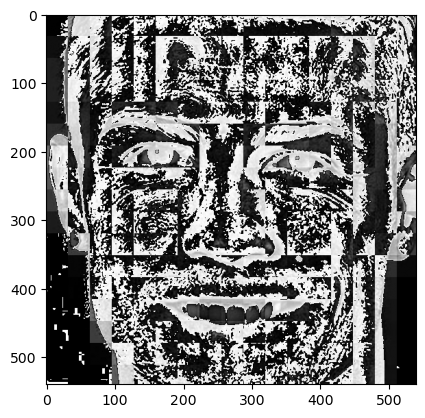

In [81]:
im_har = w2d(cropped_image, 'db1' ,5)
plt.imshow(im_har, cmap='gray')
plt.show()

In [100]:
celebrity_file_names_dict

{'luka_modric': ['./datasets/cropped/luka_modric\\luka_modric1.png',
  './datasets/cropped/luka_modric\\luka_modric10.png',
  './datasets/cropped/luka_modric\\luka_modric11.png',
  './datasets/cropped/luka_modric\\luka_modric12.png',
  './datasets/cropped/luka_modric\\luka_modric13.png',
  './datasets/cropped/luka_modric\\luka_modric14.png',
  './datasets/cropped/luka_modric\\luka_modric15.png',
  './datasets/cropped/luka_modric\\luka_modric16.png',
  './datasets/cropped/luka_modric\\luka_modric17.png',
  './datasets/cropped/luka_modric\\luka_modric18.png',
  './datasets/cropped/luka_modric\\luka_modric19.png',
  './datasets/cropped/luka_modric\\luka_modric2.png',
  './datasets/cropped/luka_modric\\luka_modric20.png',
  './datasets/cropped/luka_modric\\luka_modric21.png',
  './datasets/cropped/luka_modric\\luka_modric22.png',
  './datasets/cropped/luka_modric\\luka_modric23.png',
  './datasets/cropped/luka_modric\\luka_modric24.png',
  './datasets/cropped/luka_modric\\luka_modric25.png

In [101]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'luka_modric': ['./datasets/cropped/luka_modric\\luka_modric1.png',
  './datasets/cropped/luka_modric\\luka_modric11.png',
  './datasets/cropped/luka_modric\\luka_modric12.png',
  './datasets/cropped/luka_modric\\luka_modric13.png',
  './datasets/cropped/luka_modric\\luka_modric17.png',
  './datasets/cropped/luka_modric\\luka_modric18.png',
  './datasets/cropped/luka_modric\\luka_modric21.png',
  './datasets/cropped/luka_modric\\luka_modric22.png',
  './datasets/cropped/luka_modric\\luka_modric23.png',
  './datasets/cropped/luka_modric\\luka_modric28.png',
  './datasets/cropped/luka_modric\\luka_modric29.png',
  './datasets/cropped/luka_modric\\luka_modric3.png',
  './datasets/cropped/luka_modric\\luka_modric35.png',
  './datasets/cropped/luka_modric\\luka_modric37.png',
  './datasets/cropped/luka_modric\\luka_modric38.png',
  './datasets/cropped/luka_modric\\luka_modric4.png',
  './datasets/cropped/luka_modric\\luka_modric40.png',
  './datasets/cropped/luka_modric\\luka_modric41.png'

In [102]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'luka_modric': 0,
 'messi': 1,
 'roberto_carlos': 2,
 'ronaldo': 3,
 'zlatan_ibrahimovic': 4}

In [103]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [104]:
len(X)

209

In [105]:
len(X[0])

4096

In [106]:
X[0]

array([[ 8],
       [33],
       [50],
       ...,
       [ 0],
       [ 0],
       [ 0]], dtype=uint8)

In [107]:
y[0]

0

In [108]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(209, 4096)

In [109]:
X[0]

array([ 8., 33., 50., ...,  0.,  0.,  0.])

## Training our Model

In [110]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7547169811320755

In [112]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        11
           1       0.83      0.91      0.87        11
           2       0.78      0.78      0.78         9
           3       0.77      0.71      0.74        14
           4       0.62      0.62      0.62         8

    accuracy                           0.75        53
   macro avg       0.75      0.75      0.75        53
weighted avg       0.75      0.75      0.75        53



### Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [113]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [114]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [115]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\praja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\praja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\praja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\praja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in versio

,model,best_score,best_params
0,svm,0.794758,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.538710,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.801210,{'logisticregression__C': 5}


In [116]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, multi_class='auto',
                                     solver='liblinear'))])}

In [117]:
best_estimators['svm'].score(X_test,y_test)

0.8301886792452831

In [118]:
best_estimators['random_forest'].score(X_test,y_test)

0.5471698113207547

In [119]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8301886792452831

In [120]:
best_clf = best_estimators['logistic_regression']

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  2,  0,  0],
       [ 0, 10,  0,  0,  1],
       [ 0,  0,  9,  0,  0],
       [ 1,  1,  2, 10,  0],
       [ 0,  2,  0,  0,  6]])

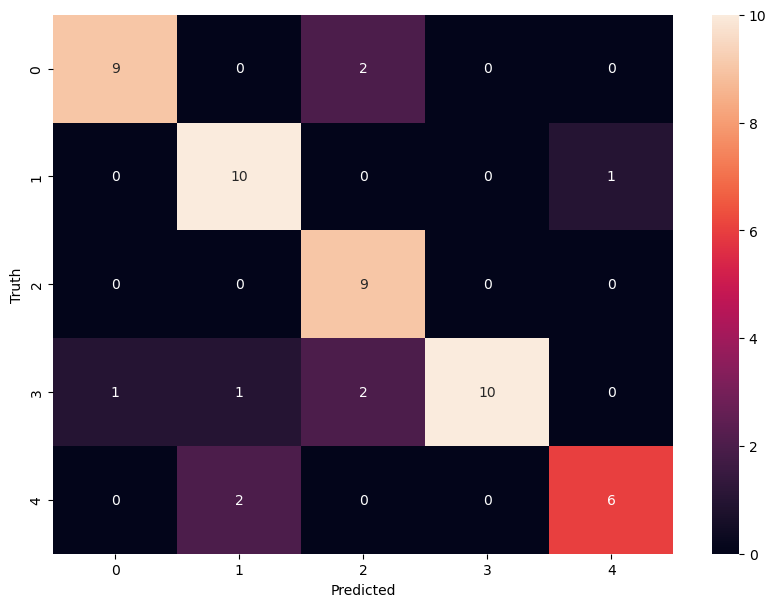

In [122]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show(1)

In [123]:
class_dict

{'luka_modric': 0,
 'messi': 1,
 'roberto_carlos': 2,
 'ronaldo': 3,
 'zlatan_ibrahimovic': 4}

### Save the trained model

In [124]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save Class dictionary 

In [125]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))